In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data_set = pd.read_csv("C:/Sefkan/data.csv")
data_set.drop(["id","Unnamed: 32"],axis=1,inplace = True)

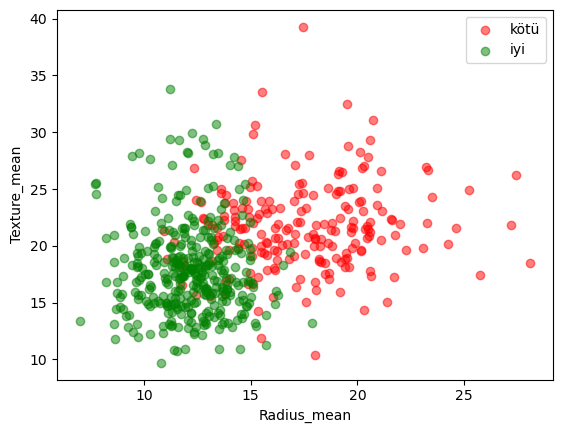

In [2]:
M = data_set[data_set.diagnosis == "M"]
B = data_set[data_set.diagnosis == "B"]

plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kötü",alpha=0.5)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha=0.5)
plt.xlabel("Radius_mean")
plt.ylabel("Texture_mean")
plt.legend()
plt.show()

In [3]:
data_set.diagnosis = [1 if each=="M" else 0 for each in data_set.diagnosis]
y = data_set.diagnosis.values
x_data = data_set.drop(["diagnosis"],axis=1)

In [4]:
import warnings
warnings.filterwarnings("ignore")

x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [5]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

In [6]:
#%% decision tree
from sklearn.tree import DecisionTreeClassifier
cf = DecisionTreeClassifier()
cf.fit(x_train,y_train)
print("Decision Tree score: ", cf.score(x_test,y_test))

Decision Tree score:  0.9302325581395349


In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
print("Random Forest Algo Result:",rf.score(x_test,y_test))

Random Forest Algo Result: 0.9534883720930233
